<a href="https://colab.research.google.com/github/NehaSontakk/BATH-Prokka-Comparison/blob/main/Microbiome_Bin_Coverage_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coverage plot for bins in Parkinsons Microbiome

The data was gathered from Syed running Metawrap/bat something - he needs to fill in these details for me




In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
bin_stats = pd.read_table("/content/metawrap_50_50_bins.stats.txt")

In [4]:
bin_stats['QC'] = bin_stats['completeness'] - bin_stats['contamination']

In [7]:
bin_stats.sort_values("QC",ascending=False)

,bin,completeness,contamination,GC,lineage,N50,size,binner,QC
0,bin.67,100.00,0.000,0.312,Euryarchaeota,49804,1676224,binsA,100.000
1,bin.150,100.00,0.021,0.631,Deltaproteobacteria,54408,2559408,binsA,99.979
2,bin.191,99.47,0.261,0.325,Lactobacillales,81024,1846091,binsA,99.209
6,bin.256,99.19,0.161,0.574,Actinobacteria,35356,2247083,binsA,99.029
4,bin.363,99.32,0.295,0.602,Deltaproteobacteria,30246,3688203,binsAB,99.025
...,...,...,...,...,...,...,...,...,...
451,bin.387,55.17,31.330,0.464,Bacteria,14742,2675935,binsAB,23.840
450,bin.97,55.48,32.130,0.483,Clostridiales,1670,4326470,binsAB,23.350
384,bin.435,65.67,44.800,0.455,Bacteria,1716,8194037,binsAB,20.870
379,bin.399,66.11,46.470,0.464,Bacteria,2125,3757772,binsAB,19.640


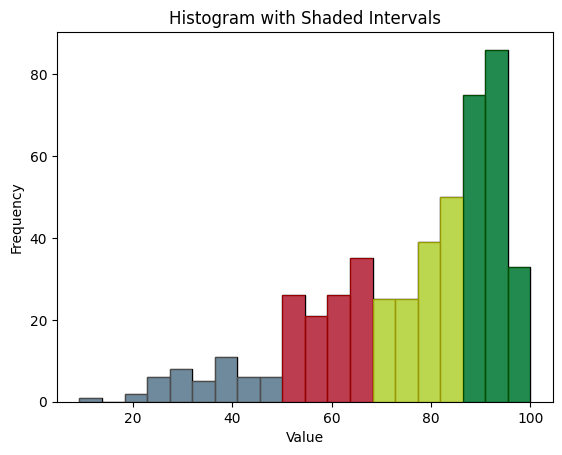

In [50]:
intervals = [(0, 51), (50, 70), (65, 90), (85, 100)]
colors = ["grey", "red", "yellow", "green"]

# Plot the histogram without shading
sns.histplot(bin_stats['QC'], bins=20, edgecolor="black")
counts, bin_edges = np.histogram(bin_stats['QC'], bins=20)

# Shade the intervals
for i, interval in enumerate(intervals):
    start_idx = np.searchsorted(bin_edges, interval[0], side="left")
    end_idx = np.searchsorted(bin_edges, interval[1], side="right")
    bar_edges = bin_edges[start_idx:end_idx]
    bar_widths = np.diff(bar_edges)
    plt.bar(bar_edges[:-1], counts[start_idx:end_idx-1],
            width=bar_widths, align='edge', color=colors[i], alpha=0.6)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram with Shaded Intervals")
plt.show()

<Axes: xlabel='contamination', ylabel='completeness'>

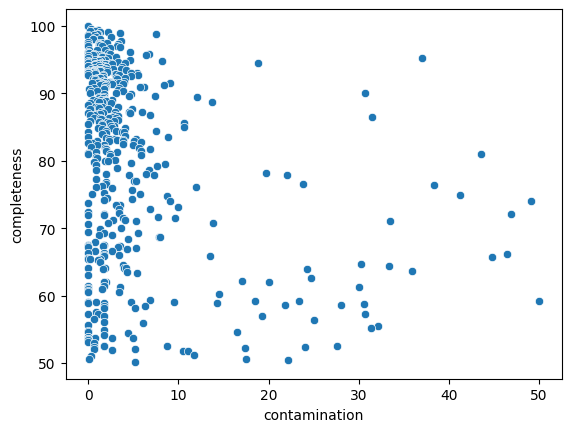

In [11]:
sns.scatterplot(x="contamination",y="completeness",data=bin_stats)

In [63]:
intervals = [(-1, 50), (50, 65), (65, 85), (85, 101)]
labels = ['Unusable', 'Low Completeness', 'Medium Completeness', 'High Completeness']

def assign_label(value):
    for i, (start, end) in enumerate(intervals):
        if start <= value < end:
            return labels[i]
    return 'Out of Range'

bin_stats['Completeness'] = bin_stats['QC'].apply(assign_label)

In [64]:
bin_stats

,bin,completeness,contamination,GC,lineage,N50,size,binner,QC,Interval,Completeness
0,bin.67,100.00,0.000,0.312,Euryarchaeota,49804,1676224,binsA,100.000,4,High Completeness
1,bin.150,100.00,0.021,0.631,Deltaproteobacteria,54408,2559408,binsA,99.979,3,High Completeness
2,bin.191,99.47,0.261,0.325,Lactobacillales,81024,1846091,binsA,99.209,3,High Completeness
3,bin.39,99.41,1.052,0.417,Lachnospiraceae,32359,2695944,binsB,98.358,3,High Completeness
4,bin.363,99.32,0.295,0.602,Deltaproteobacteria,30246,3688203,binsAB,99.025,3,High Completeness
...,...,...,...,...,...,...,...,...,...,...,...
481,bin.96,51.03,0.312,0.290,Clostridiales,21220,812237,binsA,50.718,0,Low Completeness
482,bin.28,50.64,0.087,0.494,Firmicutes,10857,798288,binsA,50.553,0,Low Completeness
483,bin.261,50.55,17.510,0.449,Clostridiales,2396,2292050,binsAB,33.040,0,Unusable
484,bin.421,50.45,22.140,0.415,Bacilli,1763,5986911,binsAB,28.310,0,Unusable


In [58]:
bin_stats[bin_stats['bin']=='bin.82']

,bin,completeness,contamination,GC,lineage,N50,size,binner,QC,Interval,Completeness
104,bin.82,93.41,0.782,0.569,Clostridiales,22041,2145246,binsA,92.628,3,High Completeness


Pick two from each interval

In [78]:
random_picks = {}

for label in labels:
    subset = bin_stats[bin_stats['Completeness'] == label]
    random_picks[label] = subset.sample(2)


for label, df in random_picks.items():
    print(f"Random picks from {label}:")
    print(df)
    print()

Random picks from Unusable:
         bin  completeness  contamination     GC        lineage   N50  \
413  bin.438         61.29          30.03  0.437       Bacteria  2234   
400  bin.416         63.66          35.86  0.409  Clostridiales  1591   

        size  binner     QC  Interval Completeness  
413  2533747  binsAB  31.26         0     Unusable  
400  7178583  binsAB  27.80         0     Unusable  

Random picks from Low Completeness:
         bin  completeness  contamination     GC   lineage   N50     size  \
440   bin.89         57.33          0.000  0.344  Bacteria  7873  1307577   
447  bin.212         56.14          1.754  0.435  Bacteria  9160  1982607   

    binner      QC  Interval      Completeness  
440  binsA  57.330         1  Low Completeness  
447  binsA  54.386         1  Low Completeness  

Random picks from Medium Completeness:
         bin  completeness  contamination     GC        lineage    N50  \
279  bin.401         81.72          6.896  0.458       Bacteria

Going to pick:
  1. High Completeness : bin.82, bin.16
  2. Medium Completeness: bin.329, bin.121
  3. Low Completeness: bin.40, bin.104

<ipython-input-94-c70ee0104895>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
<ipython-input-94-c70ee0104895>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


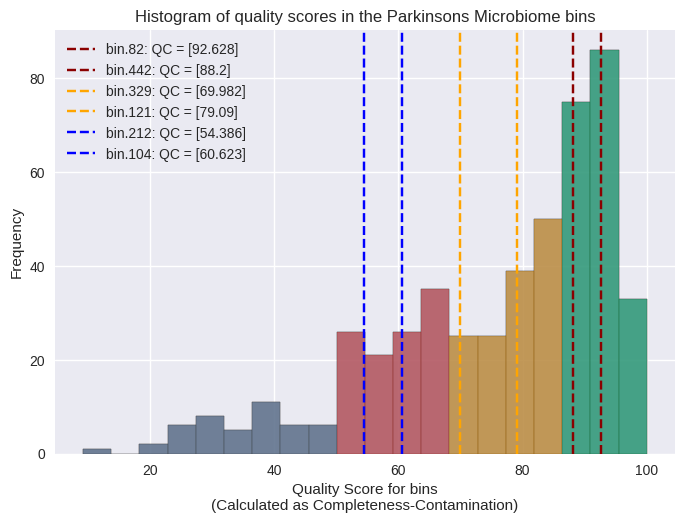

In [94]:
plt.style.use("seaborn")
plt.style.use("seaborn-darkgrid")
intervals = [(0, 51), (50, 70), (65, 90), (85, 100)]
#colors = ["grey", "red", "yellow", "green"]
colors = ["#6c757d", "#e74c3c", "#f39c12", "#27ae60"]

sns.histplot(bin_stats['QC'], bins=20, edgecolor="black")
counts, bin_edges = np.histogram(bin_stats['QC'], bins=20)

# Shade the intervals
for i, interval in enumerate(intervals):
    start_idx = np.searchsorted(bin_edges, interval[0], side="left")
    end_idx = np.searchsorted(bin_edges, interval[1], side="right")
    bar_edges = bin_edges[start_idx:end_idx]
    bar_widths = np.diff(bar_edges)
    plt.bar(bar_edges[:-1], counts[start_idx:end_idx-1],
            width=bar_widths, align='edge', color=colors[i], alpha=0.6)

point1 = bin_stats[bin_stats['bin']=='bin.82']['QC'].values
point2 = bin_stats[bin_stats['bin']=='bin.442']['QC'].values
plt.axvline(x=point1, color='darkred', linestyle='--', label=f'bin.82: QC = {point1}')
plt.axvline(x=point2, color='darkred', linestyle='--', label=f'bin.442: QC = {point2}')

point3 = bin_stats[bin_stats['bin']=='bin.329']['QC'].values
point4 = bin_stats[bin_stats['bin']=='bin.121']['QC'].values
plt.axvline(x=point3, color='orange', linestyle='--', label=f'bin.329: QC = {point3}')
plt.axvline(x=point4, color='orange', linestyle='--', label=f'bin.121: QC = {point4}')

point5 = bin_stats[bin_stats['bin']=='bin.212']['QC'].values
point6 = bin_stats[bin_stats['bin']=='bin.104']['QC'].values
plt.axvline(x=point5, color='blue', linestyle='--', label=f'bin.212: QC = {point5}')
plt.axvline(x=point6, color='blue', linestyle='--', label=f'bin.104: QC = {point6}')

plt.legend()
plt.xlabel("Quality Score for bins\n(Calculated as Completeness-Contamination)")
plt.ylabel("Frequency")
plt.title("Histogram of quality scores in the Parkinsons Microbiome bins")
plt.show()